In [9]:
# import random search, random forest, iris data, and distributions

%matplotlib notebook
from sklearn.model_selection import cross_validate
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

possible used library https://aaronmams.github.io/A-quick-and-dirty-machine-learning-post-with-Python-and-scikit-learn/

In [10]:
import pandas as pd
data = pd.read_csv('HaitiPixels_good_01.csv')  
data.head()

,Type,Red,Green,Blue
0,0,104,89,63
1,0,101,80,60
2,0,103,87,69
3,0,107,93,72
4,0,109,99,68


In [11]:
from sklearn import datasets
X=data[['Red', 'Green', 'Blue']]  # Features
y=data['Type']  # Labels
X.columns = ['Red','Green','Blue']
y.columns = ['Target']

https://www.kaggle.com/diegosch/classifier-evaluation-using-confusion-matrix

In [12]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
lda_predicted = lda.predict(X_test)
confusion = confusion_matrix(y_test, lda_predicted)

print('Linear Discriminant Analysis classifier (default settings)\n', confusion)

Linear Discriminant Analysis classifier (default settings)
 [[309938   1901]
 [   206   2528]]


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lda_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, lda_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, lda_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, lda_predicted)))

Accuracy: 0.99
Precision: 0.57
Recall: 0.92
F1: 0.71


<IPython.core.display.Javascript object>


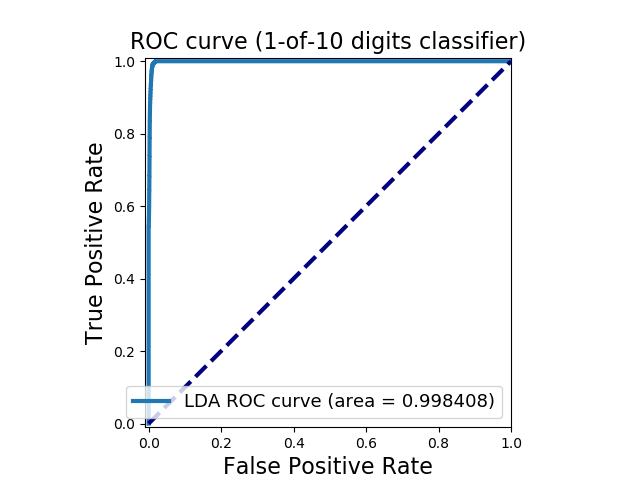

C:\Users\gladi\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [24]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

y_score_lda = lda.fit(X_train, y_train).decision_function(X_test)
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_score_lda)
roc_auc_lda = auc(fpr_lda, tpr_lda)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lda, tpr_lda, lw=3, label='LDA ROC curve (area = {:0.6f})'.format(roc_auc_lda))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [20]:
y_proba_lda = lda.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lda[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

[(0, 2.841082882768719e-20),
 (0, 5.359373271501326e-21),
 (0, 8.001137629743556e-20),
 (0, 1.9891582059812931e-22),
 (0, 1.933320384108781e-20),
 (0, 1.8300771144151025e-25),
 (0, 8.637722076214929e-23),
 (0, 2.9746355388212013e-24),
 (0, 2.5091714937528347e-27),
 (1, 0.9998005871330428),
 (0, 5.592157856534033e-21),
 (0, 3.045261988124571e-24),
 (0, 5.0057929363245234e-20),
 (0, 6.630089441436988e-23),
 (0, 7.211215424646502e-16),
 (0, 1.6821824353081898e-20),
 (0, 2.2770307170050244e-21),
 (0, 4.0078775363386484e-20),
 (0, 5.8463535401328515e-24),
 (0, 1.227259755393967e-21)]

In [23]:
y_scores_lda = lda.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lda[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

[(0, -45.00751658363338),
 (0, -46.675439911587446),
 (0, -43.97211812459312),
 (0, -49.96916050869715),
 (0, -45.39246292889385),
 (0, -56.96026921986099),
 (0, -50.80331823939472),
 (0, -54.171920708323476),
 (0, -61.24984489435484),
 (1, 8.519933741394013),
 (0, -46.632921719347955),
 (0, -54.1484552956034),
 (0, -44.441106030826184),
 (0, -51.067838844343456),
 (0, -34.865723975968066),
 (0, -45.53160984088953),
 (0, -47.531414675763564),
 (0, -44.663440051370884),
 (0, -53.49622409143506),
 (0, -48.149503109963796)]

<IPython.core.display.Javascript object>


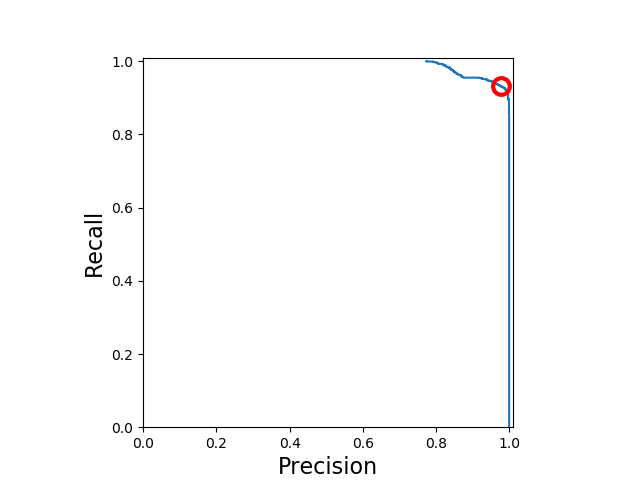

C:\Users\gladi\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


In [17]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()